# **Google playstore Data**
**Complete Exploratory Data Analysis**

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!


 ## Import Libraries


In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline 

## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [355]:
df = pd.read_csv('./googleplaystore.csv')

- Let's have look on top 5 rows of data

In [356]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 

In [357]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns',None)  
pd.set_option('display.max_rows',None)

# Hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

- let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [358]:
print(f'The name of the columns in this data frame is: {df.columns}')

The name of the columns in this data frame is: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


- Let's have a look on the shape of the dataset

In [359]:
df.shape
print(f'The no of rows {df.shape[0]} & columns {df.shape[1]}.')


The no of rows 10841 & columns 13.


Not enough, let's have a look on the columns and their data types using detailed info function

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'` 

In [361]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
----

- Let's clean the `Size` column first

In [362]:
df['Size'].isnull().sum()

np.int64(0)

- No null values, we are good to go.

In [363]:
# Let's check the unique values
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

-  There are several uniques values in the `Size` column, we have to first make the unit into one common unit from M and K to bytes, and then remove the `M` and `K` from the values and convert them into numeric data type.

In [364]:
# Find the values M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [365]:
# Find the values k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [366]:
#Find the values 'Varies with device' in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts()

Size
Varies with device    1695
Name: count, dtype: int64

In [367]:
# Total values in size column
df['Size'].value_counts().sum()

np.int64(10841)

In [368]:
# taking sum of all the values in size column which has 'M', 'K' and 'varies with device' in it
8830 + 316 + 1695

10841

- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

In [369]:
# COnvert the whole Size column into bytes

# lets define a function

def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k',"")) * 1024
        if 'M' in size:
            return float(size.replace('M',"")) * 1024 * 1024
        if 'Varies with device' in size:
            return np.nan
    return size

In [370]:
# Lets apply this function
df['Size'] = df['Size'].apply(convert_size)

In [371]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={"Size":'Size_in_bytes'} , inplace=True)

In [372]:
df.head(2)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [373]:
# Convert bytes into MBs
df['Size_in_bytes'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024) )

In [374]:
# It's done Now just we have to change the name of the column "Size_in_bytes" to "Size_in_MB"
df.rename(columns={"Size_in_bytes":'Size_in_MB'},inplace=True)


- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

In [375]:
# check the unique values in size column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [376]:
# Let's have a values count
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [377]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10840)

In [378]:
# Total values in Installs column
df['Installs'].value_counts().sum()

np.int64(10841)

In [379]:
# Check the null values
df['Installs'].isnull().sum() / len(df['Installs']) * 100

np.float64(0.0)

- The only problem I see here is the `+` sign in the values, let's remove them and convert the column into numeric data type.

- The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one value 0 has no plus sign

- Let's remove the plus sign `+` and `,` from the values and convert them into numeric data type

In [380]:
# Remove the plus sign from the install column
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',"") if '+' in str(x) else x  )
# also remove the commas from install column and make it numeric.
df['Installs'] = df['Installs'].apply(lambda x: int(x.replace(',',"") if ',' in str(x) else x) )

- let's have been check 

In [381]:
df.head()

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


> ## let's check the data type of intsall column

In [382]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size_in_MB      9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [383]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

In [384]:
df.describe()

,Rating,Reviews,Size_in_MB,Installs
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04
mean,4.191513,4.441119e+05,21.514141,1.546291e+07
std,0.515735,2.927629e+06,22.588679,8.502557e+07
min,1.000000,0.000000e+00,0.008301,0.000000e+00
25%,4.000000,3.800000e+01,4.900000,1.000000e+03
50%,4.300000,2.094000e+03,13.000000,1.000000e+05
75%,4.500000,5.476800e+04,30.000000,5.000000e+06
max,5.000000,7.815831e+07,100.000000,1.000000e+09


- We can generate a new columns based on the installation values, which will be helpful in our analysis

In [385]:
df['Installs'].max() # this will show the value counts of the column

np.int64(1000000000)

In [386]:
# Defining bins and labels 
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 1000000000] 
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch'] 
# Creating the Installs_category column 
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels) 
# Display the DataFrame print(df)
df.head(1)

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Moderate


In [387]:
df['Installs_category'].value_counts() # check the value counts of the new column

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

=====================. \
let's have look on Price column \
=====================. 

In [388]:
# check the unique values in the price column
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

- Here I saw that the only problem is $ sign.


- let's check the null values in the  `Price` column.

In [389]:
df['Price'].isnull().sum()

np.int64(0)

- There is no null values.

In [390]:
# check the value counts
df['Price'].value_counts()

Price
0          10041
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$29.99         7
$3.49          7
$7.99          7
$24.99         7
$5.49          6
$19.99         6
$6.49          5
$8.99          5
$12.99         5
$11.99         5
$10.00         3
$1.00          3
$16.99         3
$2.00          3
$17.99         2
$10.99         2
$9.00          2
$79.99         2
$7.49          2
$3.95          2
$33.99         2
$1.70          2
$13.99         2
$8.49          2
$39.99         2
$1.50          1
$25.99         1
$74.99         1
$15.99         1
$3.88          1
$1.76          1
$3.02          1
$400.00        1
$4.84          1
$2.50          1
$1.59          1
$1.61          1
$4.77          1
$5.00          1
$1.29          1
$379.99        1
$299.99        1
$37.99         1
$18.99         1
$389.99 

- We need to confirm it the values in the price column are only with $ sign or not.


In [391]:
# lets see how many values have $ sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [392]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0'))& (~df["Price"].str.contains('\$'))].value_counts().sum()

np.int64(10041)

In [393]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].str.replace('$','').astype(float)

In [394]:
df['Price'].dtype # check the data type.

dtype('float64')

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   App                10841 non-null  object  
 1   Category           10840 non-null  object  
 2   Rating             9367 non-null   float64 
 3   Reviews            10841 non-null  int64   
 4   Size_in_MB         9146 non-null   float64 
 5   Installs           10841 non-null  int64   
 6   Type               10840 non-null  object  
 7   Price              10841 non-null  float64 
 8   Content Rating     10841 non-null  object  
 9   Genres             10840 non-null  object  
 10  Last Updated       10841 non-null  object  
 11  Current Ver        10833 non-null  object  
 12  Android Ver        10839 non-null  object  
 13  Installs_category  10841 non-null  category
dtypes: category(1), float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [396]:
df.describe()

,Rating,Reviews,Size_in_MB,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


In [397]:
# using f string check min ,max , average prices of app
print(f'Minimum price is {df['Price'].min()}$')
print(f'Maximum price is {df['Price'].max()}$')
print(f'Average price is {df["Price"].mean()}$')


Minimum price is 0.0$
Maximum price is 400.0$
Average price is 1.0272733142699015$



- ##  Let's have a look on the missing values in the dataset

In [398]:
# find missing values
df.isnull().sum()


App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_MB           1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Installs_category       0
dtype: int64

In [399]:
df.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order

Size_in_MB           1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
Installs                0
App                     0
Reviews                 0
Content Rating          0
Price                   0
Last Updated            0
Installs_category       0
dtype: int64

In [400]:
# find the missing values percentage in the dataframe
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


Size_in_MB           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
Installs              0.000000
App                   0.000000
Reviews               0.000000
Content Rating        0.000000
Price                 0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

In [401]:
# FInd the total number of missing values in the dataframe
df.isnull().sum().sum()

np.int64(3182)

<Axes: >

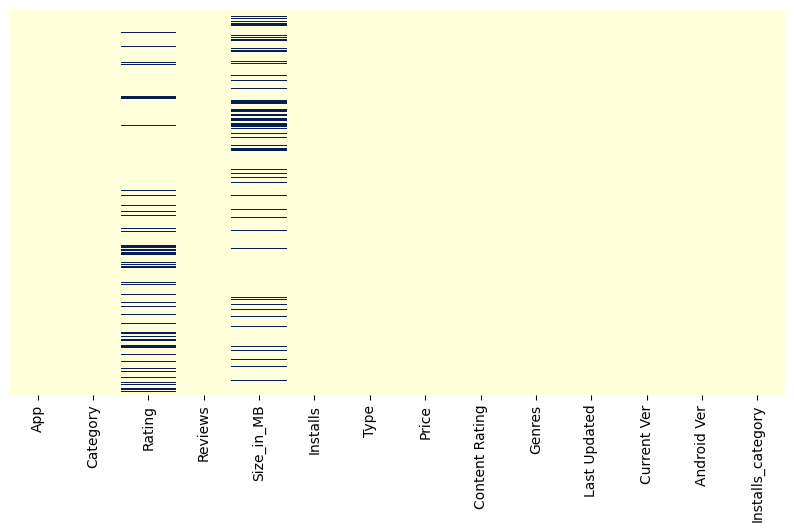

In [402]:
# Plot missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), yticklabels=False , cbar=False , cmap='YlGnBu' )


- There is another way, let's plot the missing values by percentage

Text(0, 0.5, 'Percentage of Missing Values')

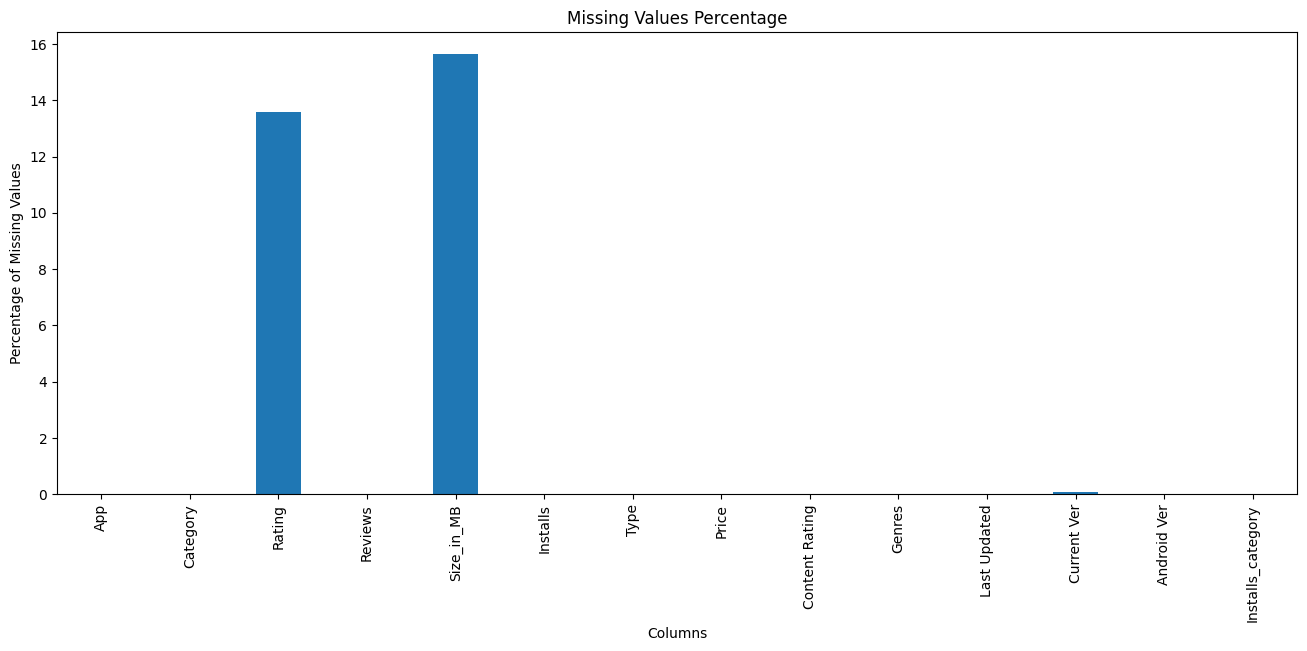

In [403]:
# make figure size
plt.figure(figsize=(16,6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# Add the labels
plt.title('Missing Values Percentage')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')


- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

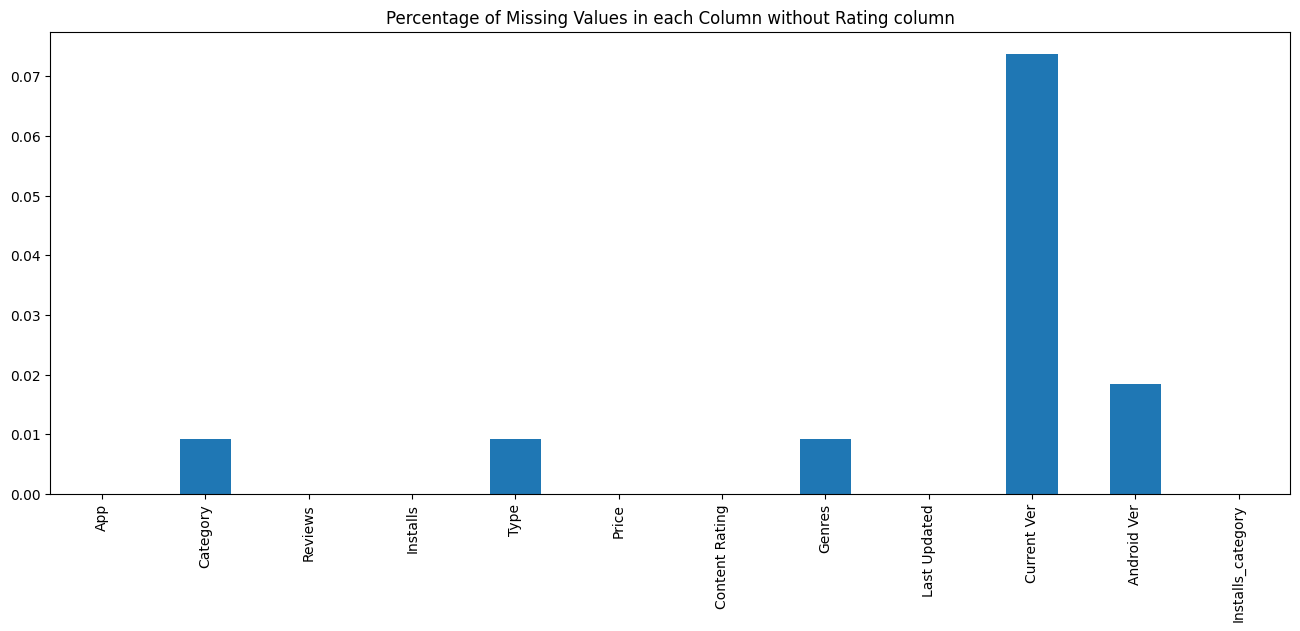

In [404]:
plt.figure(figsize=(16,6))
missing_percentage[missing_percentage < 1].plot(kind='bar')
# Add title to plot.
plt.title("Percentage of Missing Values in each Column without Rating column")

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Let's run the correlations

In [405]:
df.describe() # these are the numeric columns

,Rating,Reviews,Size_in_MB,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


<Axes: >

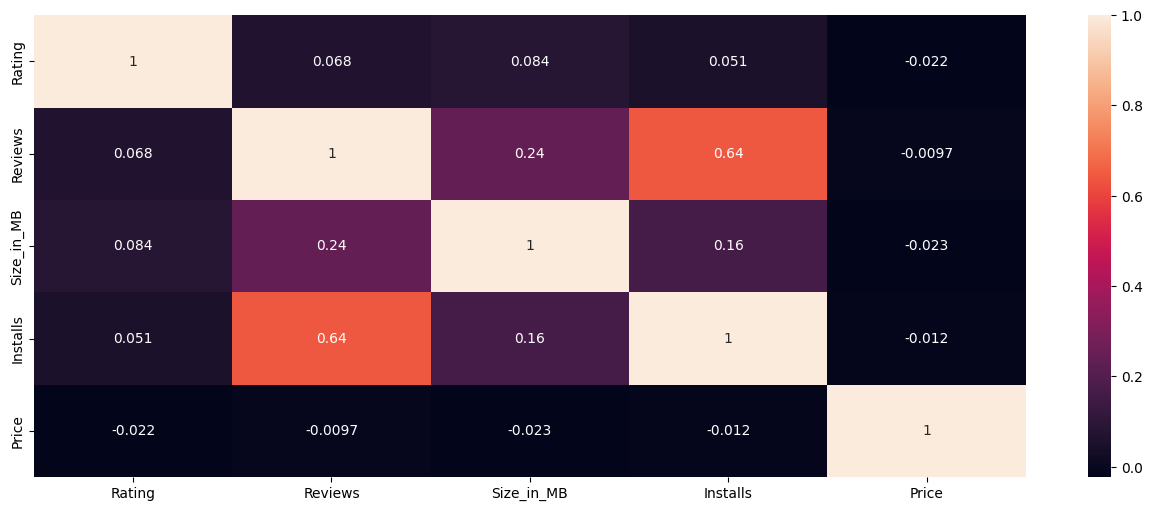

In [406]:
plt.figure(figsize=(16,6))
numeric_cols = ['Rating','Reviews',	'Size_in_MB',	'Installs',	'Price']
sns.heatmap(df[numeric_cols].corr() , annot=True)

In [407]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_in_MB,Installs,Price
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666
Size_in_MB,0.084098,0.238218,1.000000,0.164794,-0.023000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an ap with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_MB` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [408]:
# length before removing null values
print(f'Length of dataset before removing null values-{len(df)}')

Length of dataset before removing null values-10841


In [409]:
df.isnull().sum() / len(df) * 100

App                   0.000000
Category              0.009224
Rating               13.596532
Reviews               0.000000
Size_in_MB           15.635089
Installs              0.000000
Type                  0.009224
Price                 0.000000
Content Rating        0.000000
Genres                0.009224
Last Updated          0.000000
Current Ver           0.073794
Android Ver           0.018448
Installs_category     0.000000
dtype: float64

In [410]:
# Remove the rows having null values in the Category ,Type,Genres ,Current Ver ,Android Ver , from the dataframe
df.dropna(subset=['Category' ,'Type','Genres' ,'Current Ver' ,'Android Ver'] , inplace=True)


In [411]:
# length After removing null values
print(f'Length of dataset after removing null values-{len(df)}')

Length of dataset after removing null values-10829


 - We have removed 12 rows having null values in  Category ,Type,Genres ,Current Ver ,Android Ver , from the dataframe


In [412]:
df.isnull().sum().sort_values(ascending=False)

Size_in_MB           1694
Rating               1469
Category                0
App                     0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

In [413]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_MB', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Installs_category'],
      dtype='object')

In [414]:
# Use groupby function to find trend of Rating in each  Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [415]:

# # Calculate average rating for each installs category
# avg_ratings = df.groupby('Installs_category')['Rating'].mean()

# # Fill missing values in 'Rating' with the corresponding average
# df['Rating'] = df['Rating'].fillna(df['Installs_category'].map(avg_ratings))

In [417]:
df.isnull().sum()

App                     0
Category                0
Rating               1469
Reviews                 0
Size_in_MB           1694
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

In [418]:
# Calculate the mean of 'Size_in_MB', ignoring NaN values
mean_size = df['Size_in_MB'].mean()

# Fill missing values with the mean
df['Size_in_MB'] = df['Size_in_MB'].fillna(mean_size)

print(f"DataFrame after replacing missing values with mean:{df.shape[0]}")


DataFrame after replacing missing values with mean:10829


- Removed all null values

## **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.


This means that the only better way to find duplicates is to check for whole data

In [419]:
df.duplicated().sum() 

np.int64(483)

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [420]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

np.int64(1181)

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [421]:
# lets check for numbers of duplicates
for col in df.columns:
    print(f'Number od duplicates in {col} column are:{df[col].duplicated().sum()}')
    

Number od duplicates in App column are:1181
Number od duplicates in Category column are:10796
Number od duplicates in Rating column are:10789
Number od duplicates in Reviews column are:4830
Number od duplicates in Size_in_MB column are:10373
Number od duplicates in Installs column are:10809
Number od duplicates in Type column are:10827
Number od duplicates in Price column are:10737
Number od duplicates in Content Rating column are:10823
Number od duplicates in Genres column are:10710
Number od duplicates in Last Updated column are:9453
Number od duplicates in Current Ver column are:7998
Number od duplicates in Android Ver column are:10796
Number od duplicates in Installs_category column are:10821


- Find and watch all duplicates if they are real!

In [422]:
# find exact duplicates and find them
# df[df['App'].duplicated(keep=False)].sort_values(by='App')

- Remove duplicates

In [423]:
df.drop_duplicates(inplace=True)

In [424]:
df.duplicated().sum()

np.int64(0)

In [425]:
# Print the  number of rows and columns after removing duplicates
print("Number of rows after removing duplicates:", df.shape[0])

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---

## **Insights from Data**

## **1.Which category has the highest number of apps?**

In [426]:
# Which category has highest no of apps
df['Category'].value_counts().head(10) # This will give the top 10 categories with highest no of apps.

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

# **2.Which category has highest number of installs?**

In [427]:
# which category has highest number of installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)


Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# **3.Which category has the highest numbers of the reviews?**

In [428]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# **4.Which category has the highest rating?**

In [432]:
# Category with the highest average rating.
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.435556
ART_AND_DESIGN         4.377049
EDUCATION              4.375969
BOOKS_AND_REFERENCE    4.347458
PERSONALIZATION        4.333117
PARENTING              4.300000
GAME                   4.281285
BEAUTY                 4.278571
HEALTH_AND_FITNESS     4.261450
SOCIAL                 4.254918
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

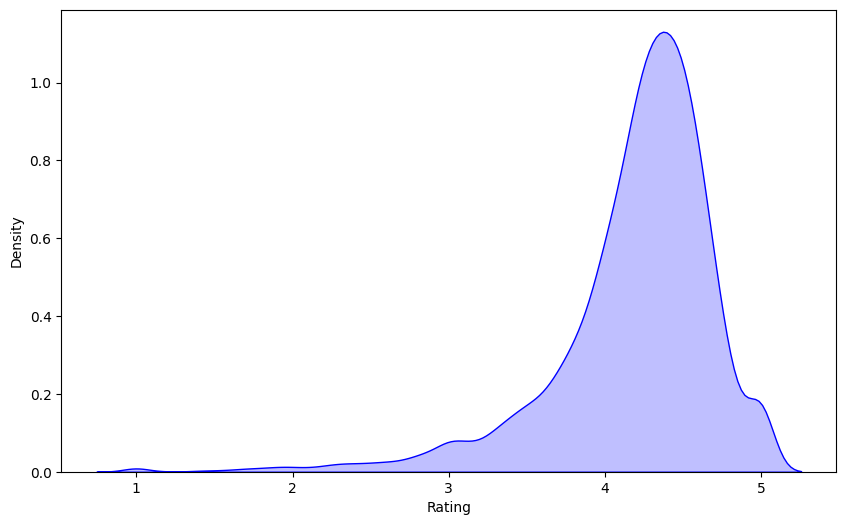

In [434]:
# Plot the Rating distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Rating'],color='blue' ,shade=True)

<Axes: xlabel='Installs', ylabel='Price'>

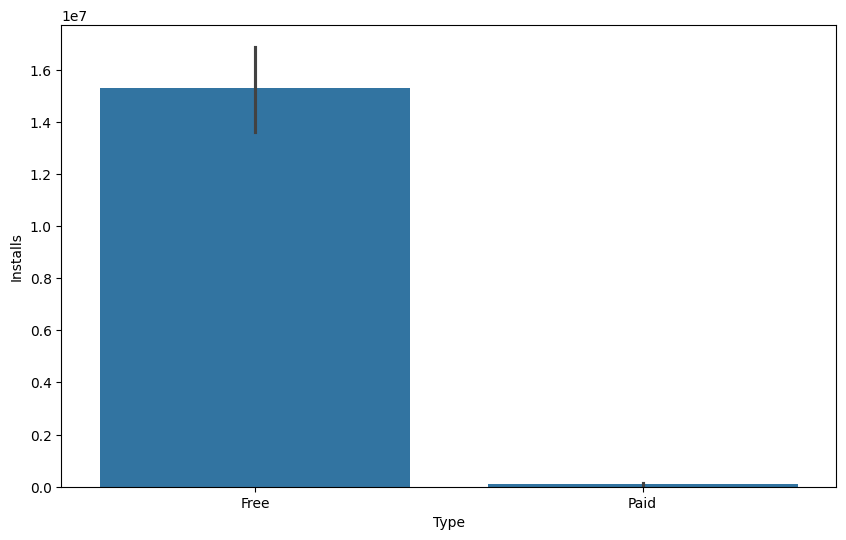

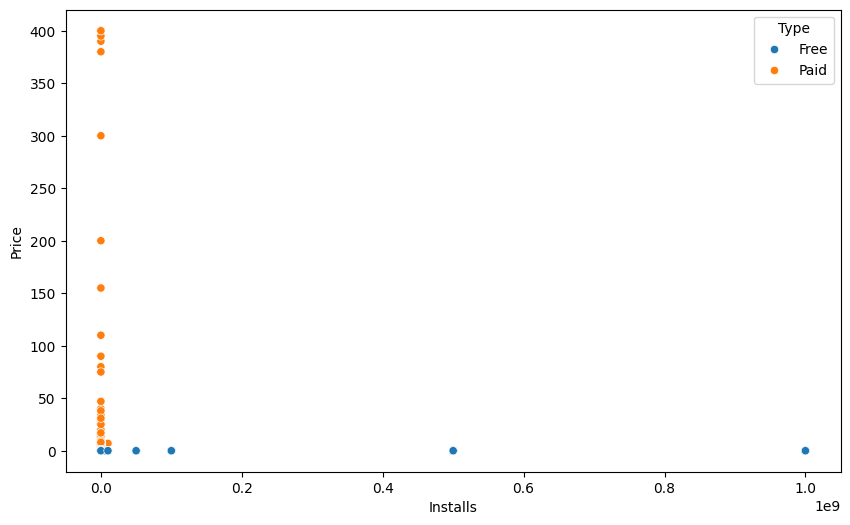

In [436]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(10,6)) # set figure size
sns.barplot(data=df,x='Type' ,y='Installs')

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(10,6)) # set figure size
sns.scatterplot(data=df,x='Installs',y='Price',hue='Type') # scatter plot with hue as Type

<Axes: xlabel='Installs_category', ylabel='Size_in_MB'>

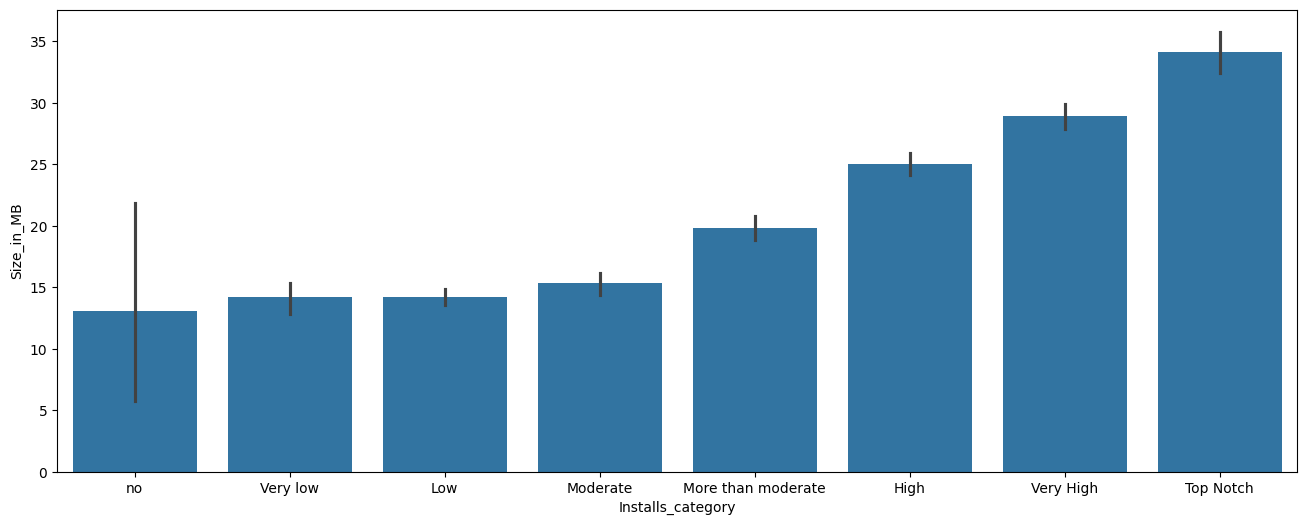

In [439]:
# Check if there is any impact of size on installs 
# make a bar plot of Size_in_MB vs Install_category
plt.figure(figsize=(16,6)) # set the figure size
sns.barplot(y='Size_in_MB', x='Installs_category', data=df) # create the bar plot

# **5.Which content Rating is most popular in installs**

In [440]:
# which content rating is most popular in inslalls
df['Content Rating'].value_counts() # returns a series with counts of each unique value in the 'Content Rating' column

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

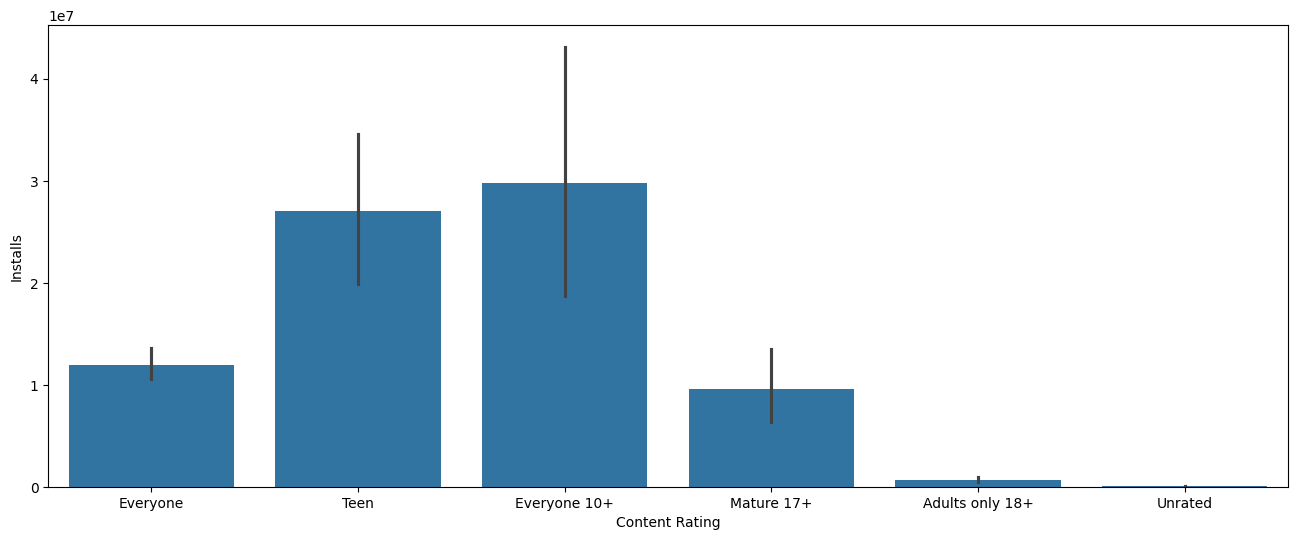

In [441]:
# plot the bar of content Rating vs Installs 
plt.figure(figsize=(16,6))
sns.barplot(data=df,x='Content Rating',y='Installs')  

# **Find how many apps are there in Everyone content rating**

In [443]:
# find how many are there in everyone content rating 
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
SPORTS                  318
PERSONALIZATION         318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
WEATHER                  78
HOUSE_AND_HOME           78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

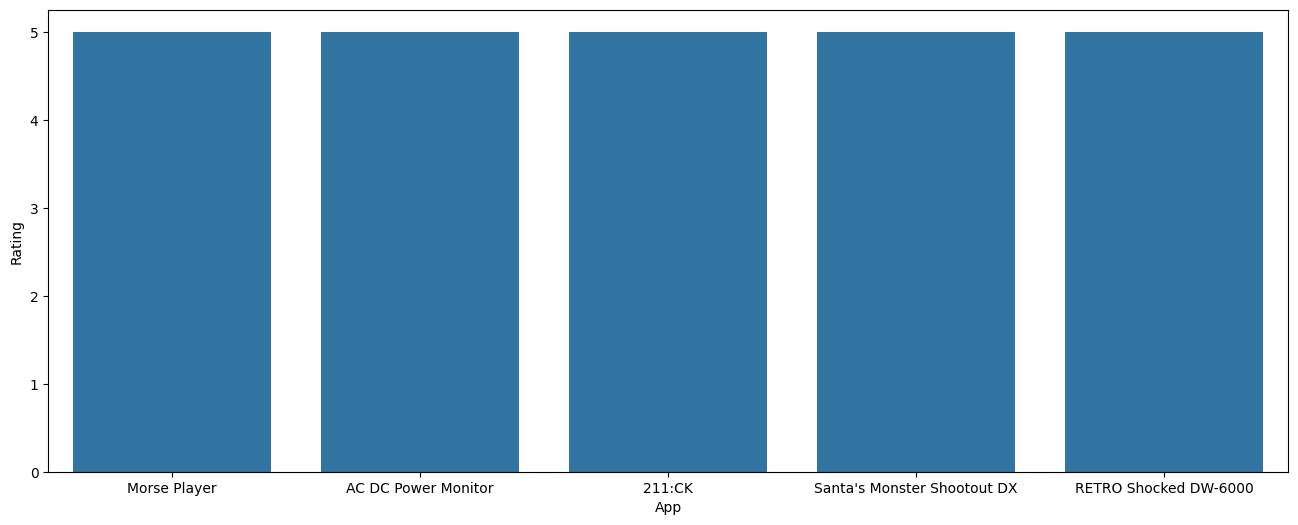

In [449]:
# Plot top 5 rated paid apps
plt.figure(figsize=(16, 6))
sns.barplot(x='App' , y='Rating',data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) 

In [450]:
df[df['Type'] == 'Paid'].sort_values(ascending=False , by='Rating').head(5)

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
8014,Morse Player,FAMILY,5.0,12,2.400000,100,Paid,1.99,Everyone,Education,"January 23, 2017",2.1.1,3.0 and up,Low
8287,AC DC Power Monitor,LIFESTYLE,5.0,1,1.200000,10,Paid,3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2.3 and up,Very low
7466,211:CK,GAME,5.0,8,38.000000,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,Very low
9056,Santa's Monster Shootout DX,GAME,5.0,4,33.000000,50,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,Low
9010,RETRO Shocked DW-6000,PERSONALIZATION,5.0,13,0.488281,100,Paid,1.49,Everyone,Personalization,"April 4, 2017",1.2,2.3 and up,Low


<Axes: xlabel='App', ylabel='Rating'>

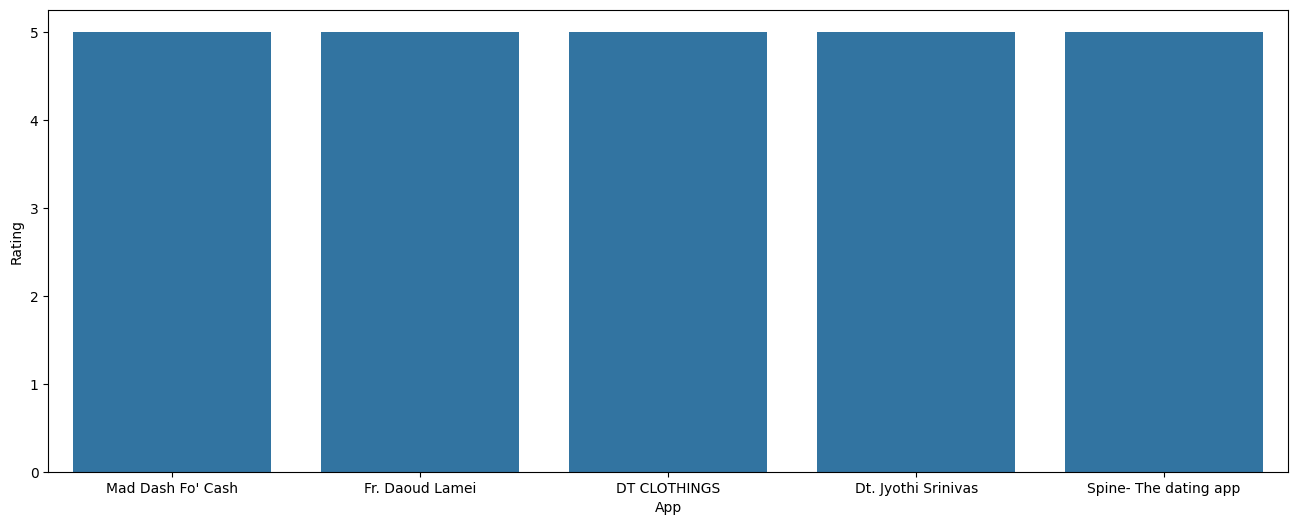

In [453]:
# Plot top rated 5 apps in free category
plt.figure(figsize=(16, 6))
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by= 'Rating', ascending=False).head(5))

In [454]:
df[df['Type'] == 'Free'].sort_values(by='Rating' , ascending=False).head(5) 

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
10721,Mad Dash Fo' Cash,GAME,5.0,14,16.0,100,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up,Low
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up,Low
8869,DT CLOTHINGS,SHOPPING,5.0,1,7.9,10,Free,0.0,Everyone,Shopping,"July 25, 2018",1.0.1,4.1 and up,Very low
8874,Dt. Jyothi Srinivas,HEALTH_AND_FITNESS,5.0,18,13.0,100,Free,0.0,Everyone,Health & Fitness,"February 6, 2018",1.0.6,4.1 and up,Low
633,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up,Low


<Axes: xlabel='App', ylabel='Reviews'>

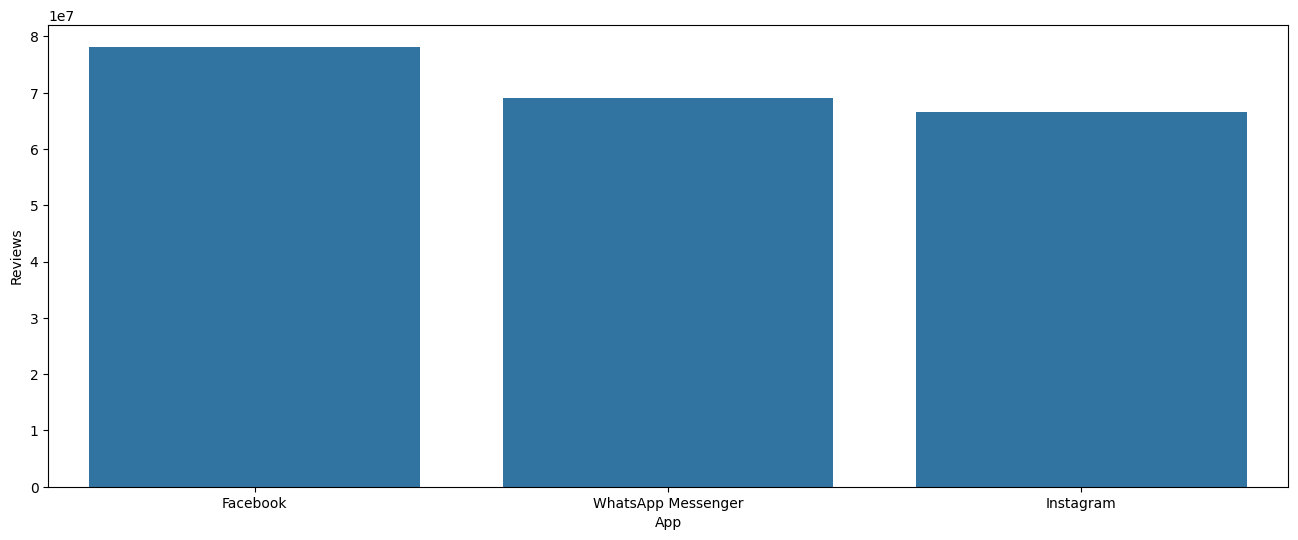

In [455]:
# Plot top Five apps with highest reviews
plt.figure(figsize=(16, 6))
sns.barplot(x='App' , y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews' , ascending=False).head(5))

In [456]:
df[df['Type'] == 'Free'].sort_values(by='Reviews' , ascending=False).head(10)

,App,Category,Rating,Reviews,Size_in_MB,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,21.534596,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,21.534596,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21.534596,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,21.534596,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,21.534596,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,Top Notch
2545,Instagram,SOCIAL,4.5,66577313,21.534596,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,Top Notch
3909,Instagram,SOCIAL,4.5,66509917,21.534596,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,Top Notch
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,21.534596,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,Top Notch
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21.534596,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,Top Notch
1879,Clash of Clans,GAME,4.6,44893888,98.000000,100000000,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,Top Notch


<Axes: xlabel='App', ylabel='Reviews'>

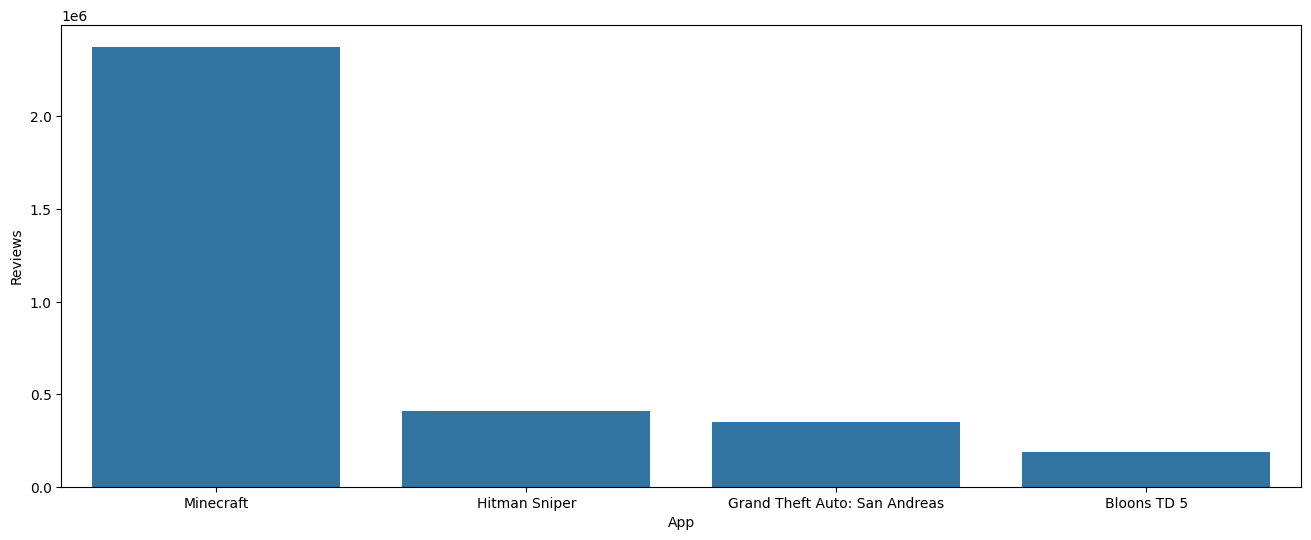

In [459]:
# PLot top five paid apps with higest numbers of reviews 
plt.figure(figsize=(16,6))
sns.barplot(x='App' , y='Reviews',data=df[df['Type'] == 'Paid'].sort_values(by='Reviews' , ascending=False).head(5) ) 

> This project deepened my understanding of data cleaning and the importance of handling missing values effectively